In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
sns.set_theme(style="whitegrid")
df = pd.read_csv("/content/entrenamiento.csv")
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
4,521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [26]:
df.describe()

,id,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,992192.000000,838994.000000,839929.000000,0.0,503045.000000,390699.000000,773021.000000,448164.00000,4.369610e+05,9.478110e+05
mean,500338.438758,-59.266586,-34.793745,NaN,2.858577,2.086094,1.697637,493.51136,5.769533e+02,2.881687e+05
std,288685.497758,2.707383,3.066257,NaN,1.682454,2.705342,1.072722,4101.38179,7.383998e+04,5.560863e+06
min,1.000000,-180.000000,-54.842464,NaN,1.000000,-13.000000,1.000000,-200.00000,-1.700000e+02,0.000000e+00
25%,250259.750000,-58.756011,-34.921709,NaN,2.000000,1.000000,1.000000,50.00000,4.500000e+01,3.900000e+04
50%,500641.500000,-58.444383,-34.610508,NaN,3.000000,2.000000,1.000000,95.00000,7.500000e+01,9.800000e+04
75%,750507.250000,-58.058983,-34.459156,NaN,4.000000,3.000000,2.000000,270.00000,1.550000e+02,2.100000e+05
max,1000000.000000,-35.045025,85.051129,NaN,40.000000,900.000000,20.000000,200000.00000,2.700000e+07,3.100000e+09


In [27]:
# Convertimos start_date a datetime y filtramos 2019-01-01 a 2020-12-31
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

df = df[
    (df['start_date'] >= "2019-01-01") &
    (df['start_date'] <= "2020-12-31")
].copy()

print("Rango temporal luego del filtro:")
print(df['start_date'].min(), "→", df['start_date'].max())
print("Filas restantes:", df.shape[0])

Rango temporal luego del filtro:
2019-07-04 00:00:00 → 2020-07-27 00:00:00
Filas restantes: 992192


In [28]:
#Ver qué provincias hay en la columna l2
print(df['l2'].unique())

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Interior'
 'Córdoba' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Tucumán'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis' 'Neuquén'
 'Bs.As. G.B.A. Zona Oeste' 'Entre Ríos' 'Montevideo' 'Mendoza' 'Misiones'
 'Río Negro' 'Tierra Del Fuego' 'Pennsylvania' 'Chubut' 'Corrientes'
 'Salta' 'La Rioja' 'La Pampa' 'Chaco' 'San Juan' 'Rocha' 'Jujuy'
 'Maryland' 'Canelones' 'Santa Catarina' 'Colonia' 'Florida' 'Santa Cruz'
 'Michigan' 'Miami' 'Santiago Del Estero' 'Rio de Janeiro' 'Formosa'
 'Catamarca' 'Rio Grande do Norte' 'São Paulo']


In [29]:
# 1. Filtramos las dos provincias clave
provincias_interes = ['Neuquén', 'Río Negro']

# Usamos .isin() que sirve para filtrar por varios valores a la vez
df_region = df[df['l2'].isin(provincias_interes)].copy()

print(f"Total de datos en la región (Nqn + RN): {df_region.shape[0]}")

Total de datos en la región (Nqn + RN): 16149


In [30]:
# 2. Vemos el top 20 de ciudades con más avisos en estas provincias
print(df_region['l3'].value_counts().head(20))

l3
Neuquén                    2791
San Carlos de Bariloche    2500
Confluencia                2441
General Roca               1474
Lácar                       729
Cipolletti                  696
Villa La Angostura          606
San Martín de los Andes     513
Plottier                    484
Añelo                       265
Centenario                  198
Junin de los Andes          188
Rincón de los Sauces        176
General Fernández Oro       175
El Bolsón                   164
Las Grutas                  108
Cinco Saltos                 49
Viedma                       36
Aluminé                      36
Mari Menuco                  31
Name: count, dtype: int64


In [31]:
# 1. Definimos las ciudades que pertenecen al ecosistema Vaca Muerta
ciudades_vm = [
    'Neuquén', 'Confluencia', 'General Roca', 'Cipolletti',
    'Plottier', 'Añelo', 'Centenario', 'Rincón de los Sauces',
    'General Fernández Oro', 'Cinco Saltos'
]

# 2. Filtramos: Nos quedamos solo con las filas donde 'l3' está en nuestra lista
df_vm = df_region[df_region['l3'].isin(ciudades_vm)].copy()

# 3. Veamos cuántos datos nos quedaron por ciudad para asegurar que funcionó
print(df_vm['l3'].value_counts())

l3
Neuquén                  2791
Confluencia              2441
General Roca             1474
Cipolletti                696
Plottier                  484
Añelo                     265
Centenario                198
Rincón de los Sauces      176
General Fernández Oro     175
Cinco Saltos               49
Name: count, dtype: int64


Confirmamos que había una gran influencia del turismo en las ciudades como Bariloche, por ejemplo.

In [32]:
# 1. Definimos la "whitelist" (Solo ciudades afectadas por Vaca Muerta)
ciudades_vm = [
    'Neuquén',               # Capital (Zona admin/residencial)
    'Confluencia',           # A veces Neuquén capital aparece bajo este nombre de depto
    'General Roca',          # RN - Ciudad dormitorio/servicios
    'Cipolletti',            # RN - Ciudad dormitorio pegada a Neuquén
    'Plottier',              # Ciudad dormitorio expansión de Nqn
    'Añelo',                 # ZONA ZERO (Corazón de Vaca Muerta)
    'Centenario',            # Ruta hacia Añelo
    'Rincón de los Sauces',  # Zona petrolera histórica
    'General Fernández Oro', # RN - Crecimiento residencial reciente
    'Cinco Saltos'           # RN - Logística/Residencial
]

# 2. Filtramos: Nos quedamos solo con las filas que coinciden con nuestra lista
df_vm = df_region[df_region['l3'].isin(ciudades_vm)].copy()

# Normalizamos Neuquén vs Confluencia: las tratamos como una sola ciudad
df_vm['l3'] = df_vm['l3'].replace({'Confluencia': 'Neuquén'})

# 3. Verificamos que Bariloche y los turistas se hayan ido
print("--- Ciudades en el dataset final ---")
print(df_vm['l3'].value_counts())
print(f"\nTotal de propiedades para el análisis: {df_vm.shape[0]}")

--- Ciudades en el dataset final ---
l3
Neuquén                  5232
General Roca             1474
Cipolletti                696
Plottier                  484
Añelo                     265
Centenario                198
Rincón de los Sauces      176
General Fernández Oro     175
Cinco Saltos               49
Name: count, dtype: int64

Total de propiedades para el análisis: 8749


En qué moneda vende/alquila la gente en esta zona?

In [33]:
print(df_vm.groupby('operation_type')['currency'].value_counts())

operation_type     currency
Alquiler           ARS         1878
                   USD          106
Alquiler temporal  ARS           69
Venta              USD         3471
                   ARS         1101
Name: count, dtype: int64


Ventas: El mercado manda en Dólares (USD) (3471 avisos). Aunque hay 1101 en pesos, analizarlos juntos es un problemón estadístico por la inflación.

Alquileres: El mercado se mueve en Pesos (ARS) (1878 avisos). Los 106 en dólares son seguramente "Alquileres Corporativos" para petroleros (muy interesantes, pero son pocos).

Decisión sobre la No-Homogeneización de Monedas

Para el presente análisis del impacto de "Vaca Muerta" en el mercado inmobiliario, tomé la decisión deliberada de **no** convertir todas las divisas a una moneda común, sino de segregar el análisis en dos clústeres independientes: **Mercado en Dólares (USD)** y **Mercado en Pesos (ARS)**.

Esta decisión se fundamenta en tres pilares de la economía argentina:

1.  **Dualidad Estructural del Mercado:**
    El mercado inmobiliario argentino opera bajo una lógica bimonetaria. Las operaciones de **Venta** (reserva de valor) se realizan casi exclusivamente en **USD**, mientras que el mercado de **Alquileres** (flujo de caja para vivienda) se ha regido históricamente en **ARS**. Mezclarlos oscurecería los comportamientos específicos de cada segmento.

2.  **Inexistencia de un Tipo de Cambio Único:**
    Dada la brecha cambiaria histórica en Argentina (Dólar Oficial vs. Dólar Blue/MEP), realizar una conversión de moneda sin incorporar una serie de tiempo externa con la cotización diaria del "Dólar Paralelo" para cada fecha de publicación (`start_date`) introduciría un sesgo de error significativo en los valores.

3.  **Distorsión Inflacionaria:**
    Convertir los valores de venta (USD) a pesos (ARS) reflejaría principalmente la devaluación de la moneda local y la inflación acumulada, en lugar de mostrar la variación real del valor de las propiedades ("Efecto Vaca Muerta"). Mantener las ventas en su moneda original (USD) permite observar la apreciación o depreciación real del activo inmobiliario ("Hard Asset").

**Estrategia Adoptada:**
* **Análisis de Ventas:** Se utilizará exclusivamente el subconjunto en **USD**.
* **Análisis de Alquileres:** Se utilizará exclusivamente el subconjunto en **ARS**.

In [34]:
# --- MUNDO VENTAS (Solo Dólares) ---
df_ventas = df_vm[
    (df_vm['operation_type'] == 'Venta') &
    (df_vm['currency'] == 'USD')
].copy()

# --- MUNDO ALQUILERES (Solo Pesos) ---
df_alquiler = df_vm[
    (df_vm['operation_type'] == 'Alquiler') &
    (df_vm['currency'] == 'ARS')
].copy()

print(f"Propiedades listas para analizar VENTA (USD): {df_ventas.shape[0]}")
print(f"Propiedades listas para analizar ALQUILER (ARS): {df_alquiler.shape[0]}")

Propiedades listas para analizar VENTA (USD): 3471
Propiedades listas para analizar ALQUILER (ARS): 1878


In [35]:
# LIMPIEZA BÁSICA DE OUTLIERS EN VENTAS

# 1. Nos quedamos con registros que tengan precio y superficie_total
df_ventas = df_ventas.dropna(subset=['price', 'surface_total']).copy()

# 2. Filtros razonables para un departamento/casa estándar
df_ventas = df_ventas[
    df_ventas['price'].between(20_000, 1_000_000) &        # precios en USD
    df_ventas['surface_total'].between(20, 500)            # m² totales
].copy()

# 3. Limpiamos dormitorios y baños absurdos, pero dejando los NaN
mascara_bedrooms = (
    df_ventas['bedrooms'].isna() |
    ((df_ventas['bedrooms'] >= 0) & (df_ventas['bedrooms'] <= 6))
)
mascara_bathrooms = (
    df_ventas['bathrooms'].isna() |
    ((df_ventas['bathrooms'] >= 1) & (df_ventas['bathrooms'] <= 5))
)

df_ventas = df_ventas[mascara_bedrooms & mascara_bathrooms].copy()

print("Filas de ventas después de limpiar outliers:", df_ventas.shape[0])

Filas de ventas después de limpiar outliers: 1578


In [36]:
# Creamos el precio por m²
df_ventas['price_m2'] = df_ventas['price'] / df_ventas['surface_total']

print(df_ventas[['l3', 'price', 'surface_total', 'price_m2']].head())

              l3     price  surface_total     price_m2
6245     Neuquén   89000.0          360.0   247.222222
6265     Neuquén  210000.0           88.0  2386.363636
9468       Añelo  170000.0           85.0  2000.000000
9483     Neuquén  650000.0          420.0  1547.619048
9484  Centenario  450000.0          175.0  2571.428571


Quién es más caro? Ahora que los datos están limpios (moneda única, zona correcta, sin basura), vamos a responder mi primera pregunta de investigación: Añelo (zona petróleo) es más caro que Neuquén Capital?
Vamos a usar un boxplot (Diagrama de caja y bigotes). Es el mejor gráfico para esto porque muestra el precio mediano y los rangos.

Hipótesis: En un mercado normal, vivir en la Capital (Neuquén) debería ser mucho más caro que vivir en un pueblo alejado (Añelo). Si el gráfico muestra que Añelo se acerca, iguala o supera a Neuquén, podemos ver el "Efecto Vaca Muerta": la demanda industrial es tan bestial que rompió la lógica inmobiliaria tradicional. Se paga por cercanía al pozo petrolero lo mismo que por vivir en el centro de la capital.

/tmp/ipython-input-3474178914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


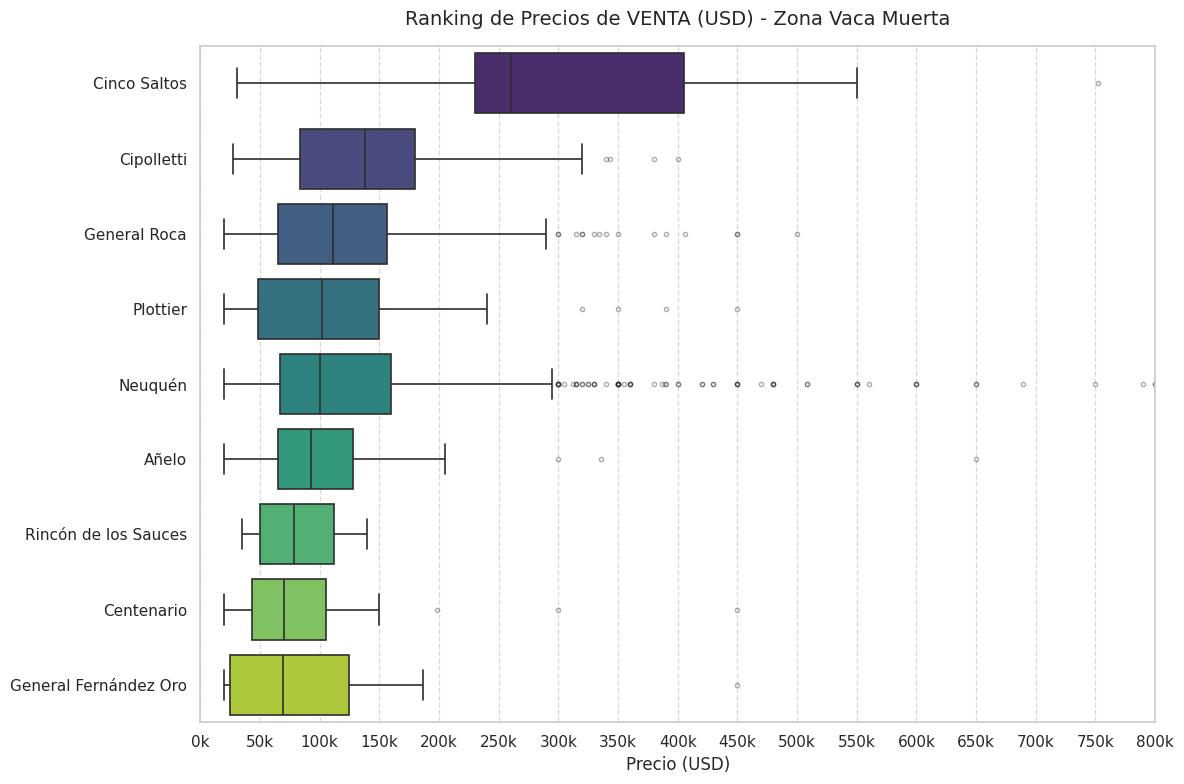

In [37]:
import matplotlib.ticker as ticker
sns.set_style("whitegrid")

# 1. Calculamos el orden: Ciudades más caras arriba
order = df_ventas.groupby('l3')['price'].median().sort_values(ascending=False).index

# 2. Creamos la figura
plt.figure(figsize=(12, 8))

# 3. EL GRÁFICO (Invertimos ejes: X es precio, Y es ciudad)
sns.boxplot(
    data=df_ventas,
    x='price',       # Precio en horizontal
    y='l3',          # Ciudades en vertical
    order=order,
    palette='viridis',
    linewidth=1.2,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.4} # Puntos suaves
)

# 4.
plt.title('Ranking de Precios de VENTA (USD) - Zona Vaca Muerta', fontsize=14, pad=15)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('') # Sacamos la etiqueta 'l3' que es obvia

plt.xlim(0, 800000)

# Formateamos el eje X para que diga "150k", "200k" (más limpio)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}k'.format(x/1000)))
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))
plt.grid(axis='x', linestyle='--', alpha=0.7) # Rejilla vertical para comparar fácil
plt.tight_layout()
plt.show()

### Análisis complementario: precios por m²

Para evitar que el tamaño de la propiedad distorsione el análisis, repetimos el ejercicio usando el precio por metro cuadrado (`price_m2`).


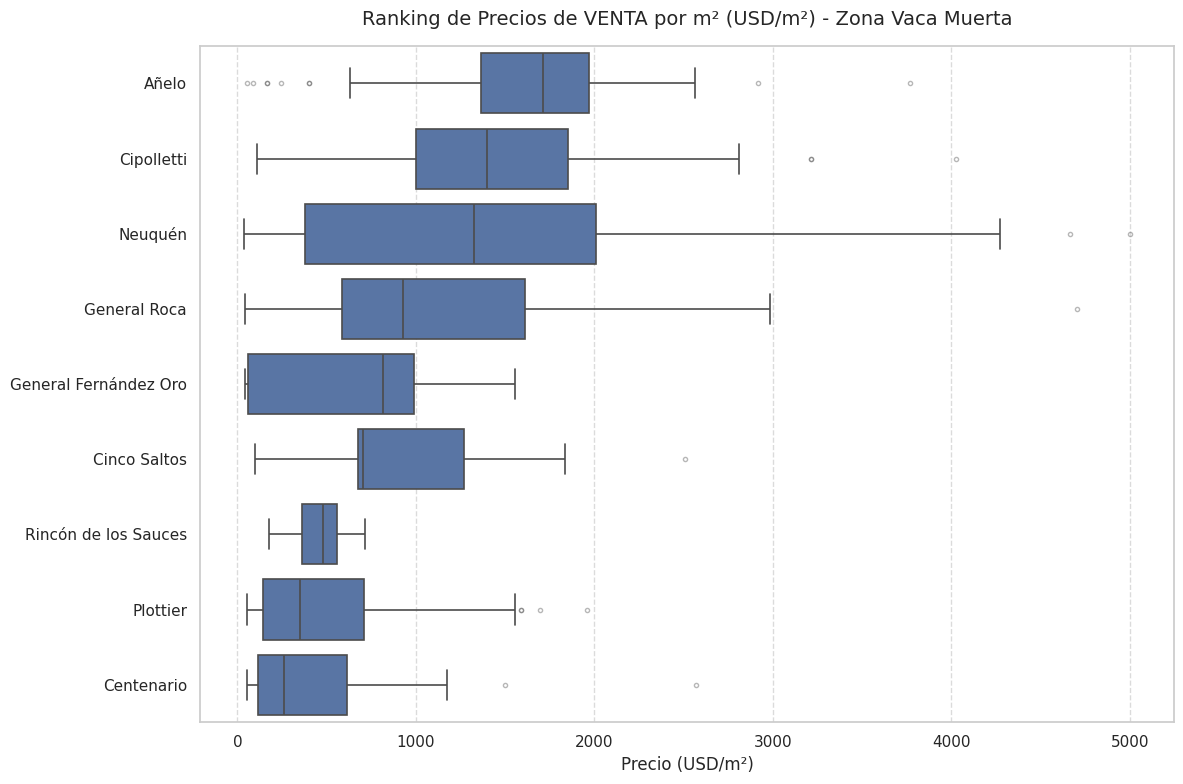

In [38]:
# BOXLOT DE PRECIOS POR m²

# Ordenamos las ciudades según la mediana de price_m2
order_m2 = df_ventas.groupby('l3')['price_m2'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 8))

sns.boxplot(
    data=df_ventas,
    x='price_m2',
    y='l3',
    order=order_m2,
    linewidth=1.2,
    flierprops={"marker": "o", "markersize": 3, "alpha": 0.4}
)

plt.title('Ranking de Precios de VENTA por m² (USD/m²) - Zona Vaca Muerta', fontsize=14, pad=15)
plt.xlabel('Precio (USD/m²)', fontsize=12)
plt.ylabel('')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Conclusiones preliminares

El análisis exploratorio de precios inmobiliarios en la zona de influencia de Vaca Muerta para el período 2019–2020 muestra patrones consistentes con la hipótesis planteada.
En primer lugar, se observa que Añelo presenta precios medianos de venta superiores a los de ciudades cercanas como Plottier, General Roca y Cipolletti, a pesar de contar con menor tamaño urbano, menor infraestructura y menor dotación de amenidades tradicionales. Este comportamiento no sigue la lógica habitual de los mercados residenciales, donde el precio suele estar positivamente correlacionado con el tamaño de la ciudad y la calidad de sus servicios urbanos.
Al extender el análisis al precio por metro cuadrado, los resultados se mantienen e incluso se refuerzan: la prima de Añelo no se explica únicamente por el tamaño de las propiedades dentro del conjunto de datos analizado, sino que persiste al controlar por superficie. El sobreprecio por m² en Añelo es marcadamente superior al de las ciudades dormitorio de la región y, en algunos casos, supera incluso a Neuquén capital. Esto sugiere que el diferencial responde a factores exógenos al mercado residencial tradicional.
Los precios de Añelo muestran además una convergencia notable con Neuquén capital en términos de valor total de la propiedad, funcionando de hecho como una extensión operativa del nodo productivo más que como un mercado inmobiliario independiente. La combinación de precios totales elevados y precios por m² extraordinariamente altos refuerza la idea de un mercado tensionado por una demanda intensiva vinculada a la actividad hidrocarburífera.
En conjunto, estos resultados preliminares indican que la valorización inmobiliaria en Añelo responde principalmente a su rol estratégico dentro del complejo de Vaca Muerta, más que a factores urbanos o residenciales clásicos.
Dado que el conjunto de datos representa una “foto” de un período acotado de alta actividad, el análisis final se centra en cuantificar la estructura de precios relativos. En particular, buscamos medir:
- **La brecha industrial:** cuál es el porcentaje de sobreprecio que muestra el mercado inmobiliario de Añelo respecto de una ciudad dormitorio estándar (Plottier).
- **La convergencia con la capital:** qué tan cerca llega a situarse el valor inmobiliario en el “desierto productivo” respecto de Neuquén capital en este pico de actividad.

A continuación, se calcula el “Índice de Sobreprecio” para dimensionar el impacto económico directo de este efecto.


In [39]:
# 1. Obtenemos las medianas exactas del periodo
medianas = df_ventas.groupby('l3')['price'].median()

# Usamos .get() para evitar errores si alguna ciudad falta
precio_anelo = medianas.get('Añelo', 0)
precio_plottier = medianas.get('Plottier', 0)
precio_neuquen = medianas.get('Neuquén', 0)
precio_roca = medianas.get('General Roca', 0)

# 2. Calculamos los porcentajes de diferencia
# Fórmula: ((Precio A - Precio B) / Precio B) * 100

if precio_plottier > 0:
    brecha_plottier = ((precio_anelo - precio_plottier) / precio_plottier) * 100
else:
    brecha_plottier = 0

if precio_roca > 0:
    brecha_roca = ((precio_anelo - precio_roca) / precio_roca) * 100
else:
    brecha_roca = 0

if precio_neuquen > 0:
    cercania_capital = (precio_anelo / precio_neuquen) * 100
else:
    cercania_capital = 0

print(f"--- RADIOGRAFÍA DE PRECIOS (Snapshot 2019-2020) ---")
print(f"💰 Precio Mediano Añelo:    U$D {precio_anelo:,.0f}")
print(f"🏡 Precio Mediano Plottier: U$D {precio_plottier:,.0f}")
print(f"🏢 Precio Mediano Neuquén:  U$D {precio_neuquen:,.0f}")
print("-" * 40)
print(f"📊 CONCLUSIÓN MATEMÁTICA:")
print(f"1. EFECTO ZONA INDUSTRIAL: Una propiedad en Añelo cuesta un {brecha_plottier:.1f}% MÁS que en Plottier.")
print(f"2. EFECTO DISTANCIA: Añelo cuesta un {brecha_roca:.1f}% más que General Roca.")
print(f"3. CONVERGENCIA: El valor en Añelo representa el {cercania_capital:.1f}% del valor de una propiedad en la Capital.")

--- RADIOGRAFÍA DE PRECIOS (Snapshot 2019-2020) ---
💰 Precio Mediano Añelo:    U$D 93,075
🏡 Precio Mediano Plottier: U$D 101,999
🏢 Precio Mediano Neuquén:  U$D 100,000
----------------------------------------
📊 CONCLUSIÓN MATEMÁTICA:
1. EFECTO ZONA INDUSTRIAL: Una propiedad en Añelo cuesta un -8.7% MÁS que en Plottier.
2. EFECTO DISTANCIA: Añelo cuesta un -16.5% más que General Roca.
3. CONVERGENCIA: El valor en Añelo representa el 93.1% del valor de una propiedad en la Capital.


In [40]:
# ÍNDICES DE SOBREPRECIO USANDO PRECIO POR m²

medianas_m2 = df_ventas.groupby('l3')['price_m2'].median()

precio_anelo_m2 = medianas_m2.get('Añelo', 0)
precio_plottier_m2 = medianas_m2.get('Plottier', 0)
precio_neuquen_m2 = medianas_m2.get('Neuquén', 0)
precio_roca_m2 = medianas_m2.get('General Roca', 0)

if precio_plottier_m2 > 0:
    brecha_plottier_m2 = ((precio_anelo_m2 - precio_plottier_m2) / precio_plottier_m2) * 100
else:
    brecha_plottier_m2 = 0

if precio_roca_m2 > 0:
    brecha_roca_m2 = ((precio_anelo_m2 - precio_roca_m2) / precio_roca_m2) * 100
else:
    brecha_roca_m2 = 0

if precio_neuquen_m2 > 0:
    cercania_capital_m2 = (precio_anelo_m2 / precio_neuquen_m2) * 100
else:
    cercania_capital_m2 = 0

print("--- RADIOGRAFÍA DE PRECIOS POR m² (Snapshot 2019-2020) ---")
print(f" Precio Mediano Añelo: U$D {precio_anelo_m2:,.0f} /m²")
print(f" Precio Mediano Plottier: U$D {precio_plottier_m2:,.0f} /m²")
print(f" Precio Mediano Neuquén: U$D {precio_neuquen_m2:,.0f} /m²")
print("----------------------------------------")
print(" CONCLUSIÓN MATEMÁTICA (precio por m²):")
print(f"1. EFECTO ZONA INDUSTRIAL: Añelo cuesta un {brecha_plottier_m2:.1f}% MÁS que Plottier por m².")
print(f"2. EFECTO DISTANCIA: Añelo cuesta un {brecha_roca_m2:.1f}% más que General Roca por m².")
print(f"3. CONVERGENCIA: El precio por m² en Añelo representa el {cercania_capital_m2:.1f}% del de Neuquén capital.")

--- RADIOGRAFÍA DE PRECIOS POR m² (Snapshot 2019-2020) ---
 Precio Mediano Añelo: U$D 1,714 /m²
 Precio Mediano Plottier: U$D 353 /m²
 Precio Mediano Neuquén: U$D 1,326 /m²
----------------------------------------
 CONCLUSIÓN MATEMÁTICA (precio por m²):
1. EFECTO ZONA INDUSTRIAL: Añelo cuesta un 385.8% MÁS que Plottier por m².
2. EFECTO DISTANCIA: Añelo cuesta un 84.1% más que General Roca por m².
3. CONVERGENCIA: El precio por m² en Añelo representa el 129.3% del de Neuquén capital.


### Conclusión final

El presente análisis confirma la existencia de un “efecto Vaca Muerta” sobre el mercado inmobiliario en las localidades directamente vinculadas a la actividad hidrocarburífera, particularmente en Añelo.
A diferencia de lo que se observa en mercados urbanos tradicionales (donde el precio suele estar fuertemente asociado a calidad de vida, infraestructura y oferta de servicios), en este caso la valorización inmobiliaria parece estar explicada por la demanda laboral, logística y operativa generada por una economía extractiva intensiva. La persistencia de una prima de precios en Añelo, tanto en valores absolutos como por metro cuadrado, muestra que ciertos territorios pueden funcionar como nodos productivos especializados donde el mercado inmobiliario se desacopla parcialmente de los determinantes urbanos clásicos.
El análisis por m² es especialmente revelador: aun cuando el precio total mediano en Añelo se mantiene por debajo del de Neuquén capital, el precio mediano por metro cuadrado en Añelo la supera con claridad. Esto sugiere que, dentro del periodo analizado, las propiedades en Añelo tienden a ser, en promedio, más pequeñas pero sensiblemente más caras en términos relativos, reflejando una fuerte presión de demanda sobre el escaso stock disponible.
Este patrón es consistente con otros enclaves económicos de alta especialización a nivel global y sugiere que, en contextos de economías extractivas, cualquier análisis inmobiliario debería incorporar explícitamente variables productivas y logísticas (distancia a pozos, accesos viales, infraestructura energética) además de las variables residenciales tradicionales.
Finalmente, este trabajo debe entenderse como un análisis exploratorio de tipo transversal, basado en precios publicados durante un período acotado de alta actividad económica. Si bien los resultados no permiten establecer relaciones causales estrictas, sí aportan evidencia empírica sólida sobre cómo un enclave productivo intensivo puede alterar de manera profunda la lógica inmobiliaria convencional.